In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df['survived'] = df.pop('survived')

In [5]:
df.head(2)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  survived     891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()*100/df.shape[0]

# we will remove deck column as it contains 77 % null value

pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
survived        0.000000
dtype: float64

In [8]:
df['embark_town'].unique() # will drop embark_town column as there is already column named as embarked showing intials of city name

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [9]:
df.drop(columns=['embark_town','deck','alive','alone','class','who','adult_male'], inplace=True)

# Use different method to impute missing value:
##### 1) delete column which contain missing data:
##### 2) Impute with SimpleImputer class: Mean, Mode, Constant: constant can be extreme value of datapoints
##### 3) Interpolation: With time series, Data has certain patterns
##### 4) KNNImputer: fill the data with most similar neighbours
##### 5) Either ffill(forward fill) or bfill(backward fill):
##### 6) MICE: Multivariate Imputation by Chained Equations - IterativeImputer class: using machine learning algorithm
### compare the result

<Axes: ylabel='Density'>

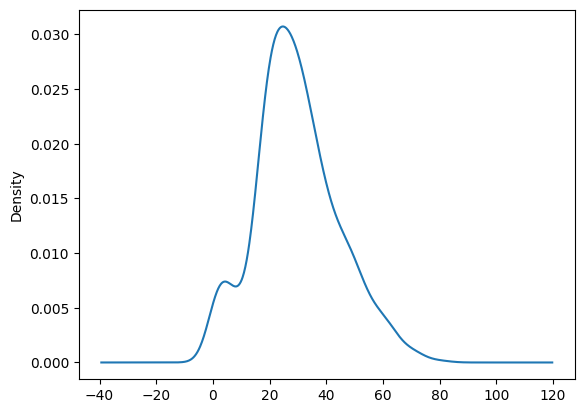

In [10]:
df['age'].plot(kind='kde')

### Categorical Imputation: 

In [11]:
# here in the embarked column, missing percentage is very less so will go with most frequent value
# when missing percentage in category column is high the it is better to define missing value as a new category

In [12]:
df['embarked'].fillna(str(df['embarked'].mode()), inplace=True)

Text(0.5, 0, 'Age')

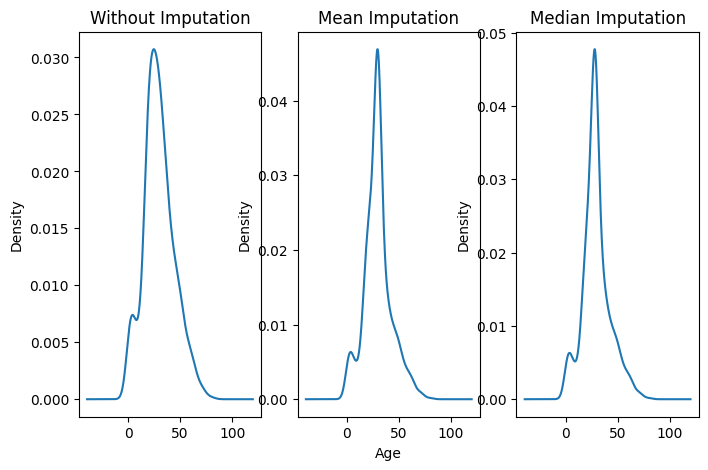

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,5))
df['age'].plot(kind='kde', title='Without Imputation', ax=ax[0], xlabel='Age')
df['age'].fillna(df['age'].mean()).plot(kind='kde', title='Mean Imputation', ax=ax[1],xlabel='Age')
df['age'].fillna(df['age'].median()).plot(kind='kde', title='Median Imputation', ax=ax[2],xlabel='Age')
ax[1].set_xlabel('Age')

In [14]:
df_mean = df.copy()
df_knn = df.copy()
df_iterative = df.copy()
df_interpolate = df.copy()
df_ffill = df.copy()
df_bfill = df.copy()

In [15]:
methods = [df_ffill, df_bfill, df_mean, df_interpolate, df_knn, df_iterative] 

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

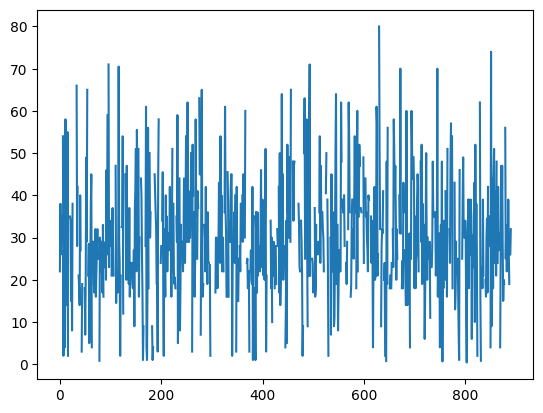

In [17]:
plt.plot(df.index, df['age']) # just checking if there is interpolation can be fit or not 

In [18]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived'],
      dtype='object')

In [19]:
df_ffill.ffill(inplace=True) # filling forward value
df_bfill.bfill(inplace=True) # filling backward value
df_mean['age'].fillna(int(df_mean['age'].mean()), inplace=True)# filling mean value
df_interpolate['age'].interpolate(inplace=True)

In [20]:
df_ffill.tail()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
886,2,male,27.0,0,0,13.00,S,0
887,1,female,19.0,0,0,30.00,S,1
888,3,female,19.0,1,2,23.45,S,0
889,1,male,26.0,0,0,30.00,C,1
890,3,male,32.0,0,0,7.75,Q,0


In [21]:
df_bfill.tail()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
886,2,male,27.0,0,0,13.00,S,0
887,1,female,19.0,0,0,30.00,S,1
888,3,female,26.0,1,2,23.45,S,0
889,1,male,26.0,0,0,30.00,C,1
890,3,male,32.0,0,0,7.75,Q,0


In [22]:
df_mean.tail()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
886,2,male,27.0,0,0,13.00,S,0
887,1,female,19.0,0,0,30.00,S,1
888,3,female,29.0,1,2,23.45,S,0
889,1,male,26.0,0,0,30.00,C,1
890,3,male,32.0,0,0,7.75,Q,0


In [23]:
df_interpolate.tail()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
886,2,male,27.0,0,0,13.00,S,0
887,1,female,19.0,0,0,30.00,S,1
888,3,female,22.5,1,2,23.45,S,0
889,1,male,26.0,0,0,30.00,C,1
890,3,male,32.0,0,0,7.75,Q,0


### KNNImputer:

In [24]:
df_knn = df_knn.drop(columns='survived')
numeric_feature = df_knn.select_dtypes(include=['int64','float64']).columns
cat_feature = df_knn.select_dtypes(exclude=['int64','float64']).columns

In [25]:
knn = KNNImputer(n_neighbors=4)

In [26]:
ct_knn = ColumnTransformer([('knn_impute',knn,numeric_feature),
                           ('encode',OneHotEncoder(sparse_output=False, drop='first'),cat_feature)])

In [27]:
x = ct_knn.fit_transform(df_knn)
y = np.array(df['survived'])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state = 42)
    
lr = LogisticRegression(max_iter = 500)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

accuracy_score(y_test, y_pred)

0.7980364656381487

In [29]:
f1_score(y_test, y_pred)

0.7131474103585658

In [30]:
x

array([[ 3. , 22. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 1. , 38. ,  1. , ...,  1. ,  0. ,  0. ],
       [ 3. , 26. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 3. , 32.5,  1. , ...,  0. ,  0. ,  1. ],
       [ 1. , 26. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 3. , 32. ,  0. , ...,  0. ,  1. ,  0. ]])

### IterativeImputer: 

In [31]:
est = LinearRegression()

<IPython.core.display.Javascript object>

In [32]:
iterative = IterativeImputer(estimator = est)

In [33]:
ct_iterative = ColumnTransformer([('iterative_impute',iterative,numeric_feature),
                           ('encode',OneHotEncoder(sparse_output=False, drop='first'),cat_feature)])

In [34]:
x = ct_iterative.fit_transform(df_iterative)
y = np.array(df['survived'])

In [35]:
x

array([[ 3.        , 22.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 21.00954003,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state = 42)

lr = LogisticRegression(max_iter = 500)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

accuracy_score(y_test, y_pred)

0.7994389901823282

In [37]:
def encoding(data):
    ct = ColumnTransformer([('t1',OneHotEncoder(sparse_output=False, drop='first'),['sex','embarked'])],
                           remainder='passthrough')
    data = ct.fit_transform(data)
#     data = pd.DataFrame(data=data, columns=[ 'sex','pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived'])
    return data

In [38]:
def prediction(data1):
    
    data = encoding(data1) # calling encoding function to encode the categorical data
    
    X = data[:,0:-1]
    y = data[:,-1]
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)
    
    lr = LogisticRegression(max_iter = 500)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    
    return accuracy_score(y_test, y_pred)

In [39]:
prediction(df_ffill)

0.7980364656381487

In [40]:
prediction(df_bfill)

0.7966339410939691

In [41]:
prediction(df_mean)

0.7980364656381487

In [42]:
prediction(df_interpolate)

0.7966339410939691

In [43]:
# Here I am referencing index = 888 and column Age
# what different method has imputed the value

In [44]:
print("Forward fill has impute: 19")
print("Backward fill has impute: 26")
print("Mean has impute: 29")
print("Interpolation has impute: 22.5")
print("KNN imputer has impute: 32.5")
print("Iterative imputer has impute: 21")

Forward fill has impute: 19
Backward fill has impute: 26
Mean has impute: 29
Interpolation has impute: 22.5
KNN imputer has impute: 32.5
Iterative imputer has impute: 21
